In [11]:
import transportation_tutorials as tt
import geopandas as gpd

In [12]:
shapefile_filename = tt.data('SERPM8-TAZSHAPE')
taz = gpd.read_file(shapefile_filename)
taz.head()

,OBJECTID,TAZ_REG,TAZ_OLD05,TAZ_MPO,COUNTY,CENSUSTAZ,TAZ_BF,FIX,AREA,F_NETAREA,CBD,HM_ROOMS,Shape_Leng,Shape_Area,geometry
0,1,1122.0,1122,1122,1.0,NaN,0,0,4442490.0,0.8153,0,0,10592.846522,4.442490e+06,"POLYGON ((936374.674 959539.568, 936373.444 95..."
1,2,17.0,17,17,1.0,NaN,0,0,15689400.0,0.8571,0,0,17396.297932,1.568938e+07,"POLYGON ((942254.500 952920.937, 942255.812 95..."
2,3,1123.0,1123,1123,1.0,NaN,0,0,17396100.0,0.8663,0,0,23585.421941,1.739613e+07,"POLYGON ((940953.561 952985.069, 940953.437 95..."
3,4,1120.0,1120,1120,1.0,NaN,0,0,1303420.0,0.8536,0,0,7202.864864,1.303422e+06,"POLYGON ((953119.000 951985.375, 953045.807 95..."
4,5,1121.0,1121,1121,1.0,NaN,0,0,31477500.0,0.8787,0,0,24940.959492,3.147748e+07,"POLYGON ((934328.283 951600.585, 934327.451 94..."


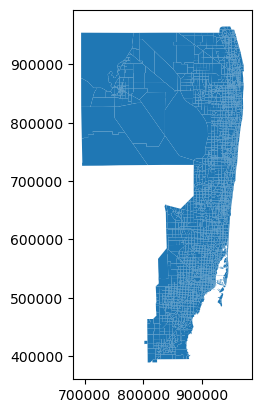

In [13]:
ax = taz.plot()

In [18]:
taz.crs

<Projected CRS: PROJCS["NAD83 / Florida East (ftUS)",GEOGCS["NAD83 ...>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

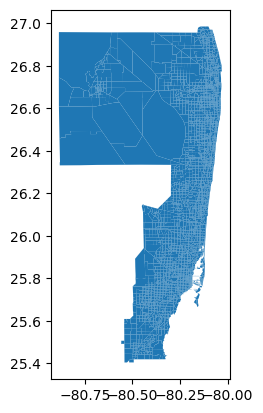

In [16]:
taz1 = taz.to_crs(epsg=4326)
ax = taz1.plot()

In [19]:
xmin = 905712.145924
ymin = 905343.94408855
xmax = 983346.68922847
ymax = 981695.93140023

In [20]:
taz_j = taz.cx[xmin:xmax, ymin:ymax]

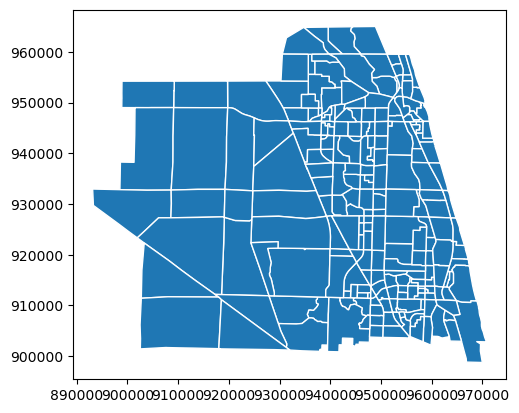

In [22]:
ax = taz_j.plot(edgecolor='w')

In [24]:
taz_j2 = taz.cx[xmin:, ymin:]
taz_j2.equals(taz_j)

True

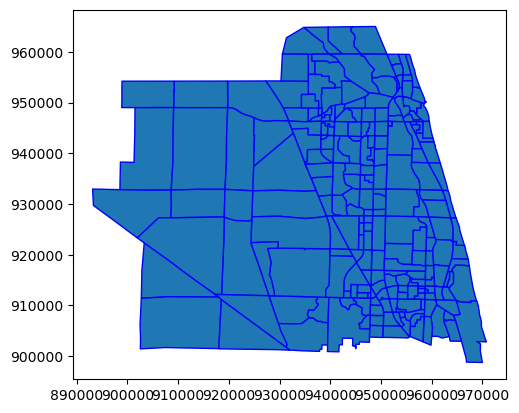

In [26]:
ax = taz_j2.plot(edgecolor='b')

/Users/hyunhwakim/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


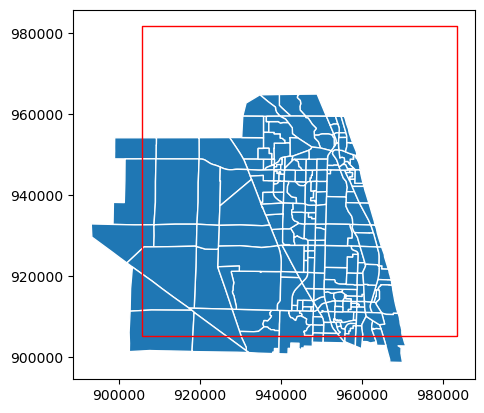

In [28]:
from shapely.geometry import box
study_area = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs={'init': 'epsg:2236'})
ax = taz_j.plot(edgecolor='w')
transparent = (0,0,0,0)
ax = study_area.plot(ax=ax, edgecolor='red', facecolor=transparent)

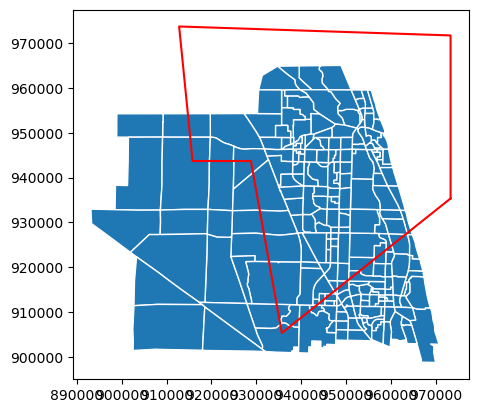

In [29]:
from shapely.geometry import Polygon
irregular_polygon = Polygon([
    (973346, 935343),
    (973346, 971695),
    (912812, 973695),
    (915812, 943695),
    (928812, 943695),
    (935712, 905343),
])
ax = taz_j.plot(edgecolor='w')
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

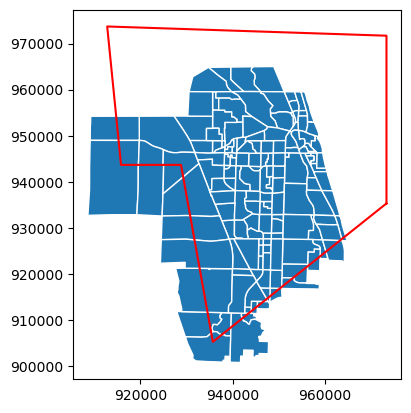

In [30]:
taz_j_irr = taz_j[taz_j.intersects(irregular_polygon)]
taz_j_irr = taz_j_irr.copy()
ax = taz_j_irr.plot(edgecolor='w')
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

In [35]:
taz_j_clip = gpd.overlay(taz, study_area, how='intersection')

/var/folders/2x/jsjly82j6039nhcnzctn50kh0000gn/T/ipykernel_1397/1782276776.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83 / Florida East (ftUS)",GEOGCS["NAD83 ...
Right CRS: EPSG:2236

  taz_j_clip = gpd.overlay(taz, study_area, how='intersection')


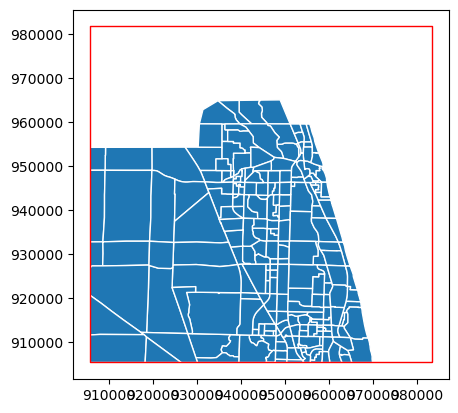

In [36]:
ax = taz_j_clip.plot(edgecolor='w')
transparent = (0,0,0,0)
ax = study_area.plot(ax=ax, edgecolor='red', facecolor=transparent)

In [37]:
taz_j_irr.geometry = taz_j_irr.intersection(irregular_polygon)

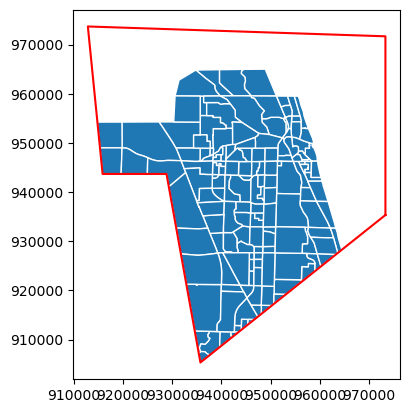

In [38]:
ax = taz_j_irr.plot(edgecolor='w')
transparent = (0,0,0,0)
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

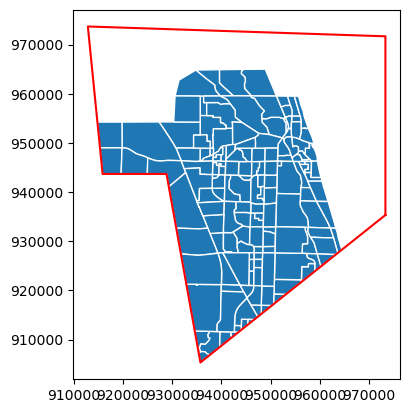

In [39]:
taz_j_clip.geometry = taz_j_clip.intersection(irregular_polygon)

ax = taz_j_clip.plot(edgecolor='w')
transparent = (0,0,0,0)
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

In [40]:
mazshape_filename = tt.data('SERPM8-MAZSHAPE')
maz = gpd.read_file(mazshape_filename)
maz.head()

,OBJECTID,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,geometry
0,1,5347,8589.393674,3.111034e+06,71,953130,724165,"POLYGON ((953970.466 723936.081, 953972.382 72..."
1,2,5348,11974.067469,7.628753e+06,175,907018,634551,"POLYGON ((908505.280 635081.774, 908488.945 63..."
2,3,5349,9446.131753,4.007041e+06,92,923725,707062,"POLYGON ((922736.637 708387.692, 923950.960 70..."
3,4,5350,21773.153739,2.487397e+07,571,908988,713484,"POLYGON ((908334.237 715692.263, 908714.653 71..."
4,5,5351,17882.701416,1.963139e+07,451,909221,717493,"POLYGON ((911883.019 719309.326, 911940.995 71..."


In [43]:
maz_j = maz.cx[xmin:xmax, ymin:ymax]
len(maz_j)

361

In [45]:
maz_taz = gpd.overlay(maz_j, taz_j, how='intersection')
maz_taz.head()

/Users/hyunhwakim/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/var/folders/2x/jsjly82j6039nhcnzctn50kh0000gn/T/ipykernel_1397/383295601.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1521 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  maz_taz = gpd.overlay(maz_j, taz_j, how='intersection')


,OBJECTID_1,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,OBJECTID_2,TAZ_REG,TAZ_OLD05,...,CENSUSTAZ,TAZ_BF,FIX,AREA,F_NETAREA,CBD,HM_ROOMS,Shape_Leng,Shape_Area,geometry
0,2389,7736,10592.846522,4.442490e+06,102,936259,957308,1,1122.0,1122,...,NaN,0,0,4442490.0,0.8153,0,0,10592.846522,4.442490e+06,"POLYGON ((936373.444 958211.473, 936985.437 95..."
1,2390,7737,17396.297932,1.568938e+07,360,940102,950911,3,1123.0,1123,...,NaN,0,0,17396100.0,0.8663,0,0,23585.421941,1.739613e+07,"POLYGON ((938309.917 952656.485, 938308.351 95..."
2,2391,7738,18511.806088,1.405994e+07,323,937715,953796,3,1123.0,1123,...,NaN,0,0,17396100.0,0.8663,0,0,23585.421941,1.739613e+07,"POLYGON ((938072.285 952651.635, 937929.056 95..."
3,6329,11676,10422.047410,3.336191e+06,77,937781,950989,3,1123.0,1123,...,NaN,0,0,17396100.0,0.8663,0,0,23585.421941,1.739613e+07,"POLYGON ((938316.202 951630.563, 938211.071 95..."
4,3052,8399,23965.014606,3.096111e+07,711,934758,961537,664,1105.0,1105,...,NaN,0,0,30961100.0,0.8148,0,0,23965.014606,3.096111e+07,"POLYGON ((938616.375 961787.437, 938675.000 96..."


In [46]:
len(maz_taz)

564

In [47]:
maz_taz.head().area

0    4.442490e+06
1    1.878210e-03
2    1.405994e+07
3    3.336191e+06
4    3.096111e+07
dtype: float64

MissingSchema: Invalid URL 'OSM_A': No scheme supplied. Perhaps you meant https://OSM_A?

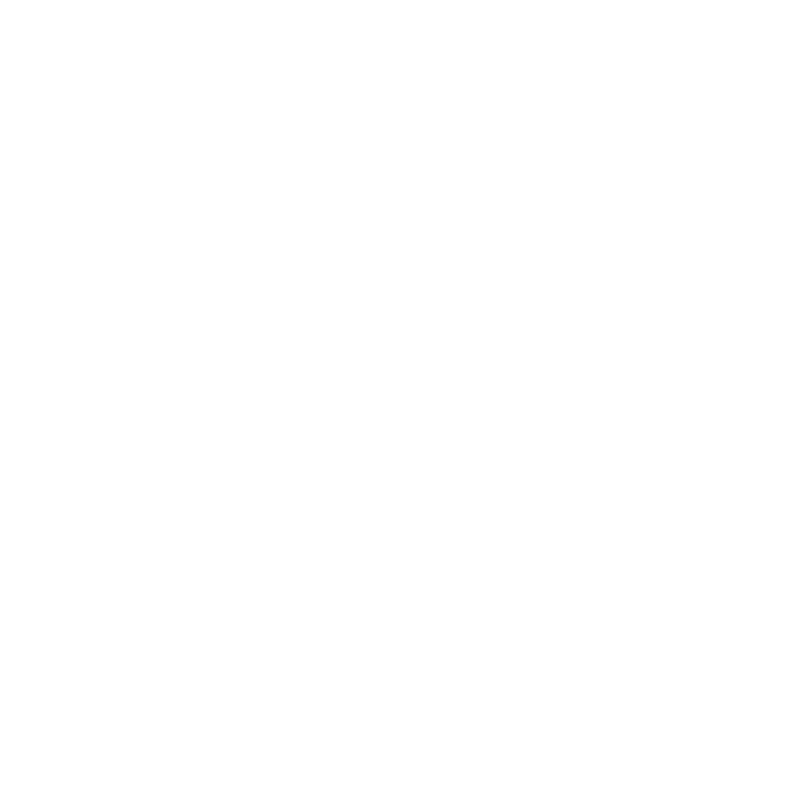

In [51]:
ax = tt.mapping.make_basemap(xlim=(938500,945500), ylim=(937500,944500), zoom=15, tiles='OSM_A', epsg=2236, axis='off')
# ax = taz_j.plot(ax=ax, edgecolor='blue', linewidth=2, facecolor=transparent )
# ax = maz_j.plot(ax=ax, edgecolor='red', linewidth=1, facecolor=transparent )